Afonso Lavado | 20220631@novaims.unl.pt

Afonso Reyna | 20191197@novaims.unl.pt

Fernando Cruz | 20220646@novaims.unl.pt

Mariana Rodrigues | 20220627@novaims.unl.pt

Pedro Fernandes | 20220592@novaims.unl.pt 

Data Source | https://drive.google.com/file/d/1bs3GM_j9XScOEm-mNOG3ZEYg7-NVTc1C/view?usp=share_link

Summary of the notebook:

In this notebook we are going to test different Transfer Learning models with our best model. To do so, we selected some models from the Keras Applications webpage and built 9 models, all with the same top layer architecture and fitted with 2 epochs to our train dataset (ds_train) without augmentation. This was the fairer way we found to compare the pre-trained models to ours.

In the first model we will explain every line of the build function. All the others are exactly the same, changing only the model that we called from keras.applications.

For each model we build it in a function, see its layers with the summary() method, fit the model with the data without augmentation, evaluate the model taking the loss and accuracy as metrics and plot the loss, accuracy, val loss and val accuracy.

In the end, we plotted a table comparing all the models with our best model (using test loss and accuracy) and conclude.

References:

https://keras.io/api/applications/

https://www.kaggle.com/code/mauriciofigueiredo/fruit-classification-with-transfer-learning/notebook

https://towardsdatascience.com/how-to-reduce-training-time-for-a-deep-learning-model-using-tf-data-43e1989d2961

https://github.com/arshren/Image_Input_TF2.3/blob/master/Cat%20n%20Dog.ipynb

https://www.kaggle.com/code/mdabdullahalhasib/image-classification-with-transfer-learning

https://medium.com/@saket.srivastawa/image-classification-using-transfer-learning-49411ececf5d

https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38

https://www.kaggle.com/code/viratkothari/image-classification-transfer-learning-resnet50

# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, models, metrics
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import NASNetMobile

import numpy as np
import pandas as pd

import zipfile
import time
import shutil
import os
import gdown
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Accessing the Dataset

In [ ]:
# Set the machine
gdrive = True
# Set the connection string
path = "/content/drive/MyDrive/DL/"
main_folder, training_folder, testing_folder = "Sports10_clean/", "training_set/", "test_set/"
# If using Google Drive
if gdrive:
    # Setup drive
    from google.colab import drive
    drive.mount('/content/drive')        
    # Transfer zip dataset to the current virtual machine
    t0 = time.time()
    shutil.copyfile(path + 'Sports10_clean.zip', 'Sports10_clean.zip')
    # Extract files
    zip_ = zipfile.ZipFile('Sports10_clean.zip')
    zip_.extractall()
    zip_.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    path = ""

Mounted at /content/drive
File transfer completed in 304.860 seconds


In [ ]:
path = "/content/content/"

In [ ]:
#Defining some parameters
image_size=(128, 128)
crop_to_aspect_ratio=True
color_mode='rgb'
batch_size=32
label_mode="categorical"
validation_split=0.3
shuffle=True
learning_rate = 0.001
seed=0
num_classes = 10

The next 2 cells are used to remove the ipynb_checkpoints classes that are created

In [ ]:

rmdir /content/content/Sports10_clean/test_set/".ipynb_checkpoints"


In [ ]:
rmdir /content/content/Sports10_clean/training_set/".ipynb_checkpoints"

In [ ]:
# Generate an object of type tf.data.Dataset 
ds_train, ds_val = image_dataset_from_directory(path + main_folder + training_folder, 
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                color_mode=color_mode,
                                                batch_size=batch_size,
                                                labels = "inferred",
                                                label_mode=label_mode,
                                                subset='both',
                                                validation_split=validation_split, 
                                                shuffle=shuffle,
                                                seed=seed
                                                )
# Check object properties
print("\nObject's type:\t", type(ds_train))
print("Is it a tf.data.Dataset?\t R:",isinstance(ds_train, tf.data.Dataset))
print("Classes:", ds_train.class_names)

Found 72552 files belonging to 10 classes.
Using 50787 files for training.
Using 21765 files for validation.

Object's type:	 <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
Is it a tf.data.Dataset?	 R: True
Classes: ['AmericanFootball', 'Basketball', 'BikeRacing', 'CarRacing', 'Fighting', 'Hockey', 'Soccer', 'TableTennis', 'Tennis', 'Volleyball']


In [ ]:
ds_test = image_dataset_from_directory(path + main_folder + testing_folder, 
                                       image_size=image_size,
                                       crop_to_aspect_ratio=crop_to_aspect_ratio,
                                       color_mode=color_mode,
                                       batch_size=batch_size,
                                       label_mode=label_mode,                                     
                                       shuffle=shuffle,
                                       seed=seed)

Found 27448 files belonging to 10 classes.


# Models

## Xception


Description of the build function:

*  **"inputs = tf.keras.layers.Input(shape=(128, 128, 3))"**: This line creates an input layer for the model that expects input images with a size of 128x128 pixels and 3 color channels (RGB).

*   **"base_model = tf.keras.applications.Xception(include_top=False, input_tensor=inputs, weights="imagenet")"**: This line initializes the Xception model with pre-trained weights on the ImageNet dataset. **weights="imagenet"** means that we are loading the pre-trained weights of the model trained on the ImageNet dataset. **include_top=False** means that the final fully connected layer of the Xception model is not included, which allows us to build our own output layer. **input_tensor=inputs** specifies the input layer to use.

*   **"base_model.trainable = False"**: This line freezes the pre-trained weights of the Xception model so that they are not updated during training.

*   **"x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)"**: This line adds a global average pooling layer to the output of the Xception model. This layer computes the average of each feature map in the output, reducing the size of the output to a fixed size for any input image size.

*   **"x = layers.BatchNormalization()(x)"**: This line adds a batch normalization layer to normalize the output of the previous layer. This helps to speed up training and reduce overfitting.

*   **"x = layers.Dropout(rate=0.2, name="top_dropout")(x)"**: This line applies dropout regularization to the output of the previous layer. Dropout randomly sets a fraction of the inputs (0.2) to zero during training, which also helps prevent overfitting.

*   **"outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)"**: This line adds a fully connected output layer with a softmax activation function. **num_classes** is the number of output classes we are predicting, which was previously defined as 10.

*   **"model = tf.keras.Model(inputs, outputs, name="EfficientNet")"**: This line creates a Keras Model object that specifies the input and output layers of our model.

*   **"model = tf.keras.Model(inputs, outputs, name="EfficientNet")"**: This line creates a Keras Model object that specifies the input and output layers of our model.

*   **"model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=[metrics.BinaryAccuracy(name='accuracy'), metrics.AUC(name='AUROC')]"**: This line compiles the model and specifies the optimizer, loss function, and metrics to use during training. **optimizer** is the algorithm used to update the model weights during training. **loss** is the objective function to optimize during training. **metrics** is a list of metrics to evaluate the performance of the model during training. In this case, the binary accuracy and area under the receiver operating characteristic curve (AUROC) are used as metrics.











In [ ]:
def build_model_Xception(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.Xception(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output) 
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_Xception = build_model_Xception(num_classes)

In [ ]:
model_Xception.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_18[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                       

In [ ]:
#Fitting the model
history_Xception = model_Xception.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - ETA: 0s - loss: 0.6240 - accuracy: 0.9625 - AUROC: 0.9748

In [ ]:
#Evaluate using the test dataset
score_Xception = model_Xception.evaluate(ds_test)
print('Test loss:', score_Xception[0])
print('Test accuracy:', score_Xception[1])

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_Xception.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)

# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## VGG16

In [ ]:
def build_model_VGG16(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.VGG16(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  

  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output) 
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_VGG16 = build_model_VGG16(num_classes)

In [ ]:
model_VGG16.summary()

Model: "EfficientNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)      

In [ ]:
#Fitting the model
history_VGG16 = model_VGG16.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 368s 227ms/step - loss: 0.2424 - accuracy: 0.9861 - AUROC: 0.9955 - val_loss: 0.0652 - val_accuracy: 0.9965 - val_AUROC: 0.9992
Epoch 2/2
1588/1588 [==============================] - 309s 194ms/step - loss: 0.0895 - accuracy: 0.9946 - AUROC: 0.9988 - val_loss: 0.0486 - val_accuracy: 0.9972 - val_AUROC: 0.9994


In [ ]:
#Evaluate using the test dataset
score_VGG16 = model_VGG16.evaluate(ds_test)
print('Test loss:', score_VGG16[0])
print('Test accuracy:', score_VGG16[1])

858/858 [==============================] - 121s 139ms/step - loss: 0.5868 - accuracy: 0.9677 - AUROC: 0.9768
Test loss: 0.5867908596992493
Test accuracy: 0.9676916599273682


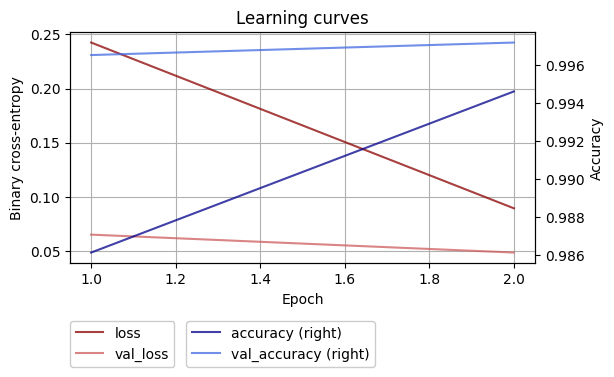

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_VGG16.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)

# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## VGG19

In [ ]:
def build_model_VGG19(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))
  
  base_model = tf.keras.applications.VGG19(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output) 
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_VGG19 = build_model_VGG19(num_classes)

In [ ]:
model_VGG19.summary()

Model: "EfficientNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)      

In [ ]:
#Fitting the model
history_VGG19 = model_VGG19.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 312s 194ms/step - loss: 0.2731 - accuracy: 0.9840 - AUROC: 0.9945 - val_loss: 0.0804 - val_accuracy: 0.9956 - val_AUROC: 0.9989
Epoch 2/2
1588/1588 [==============================] - 366s 230ms/step - loss: 0.1096 - accuracy: 0.9931 - AUROC: 0.9985 - val_loss: 0.0671 - val_accuracy: 0.9960 - val_AUROC: 0.9990


In [ ]:
#Evaluate using the test dataset
score_VGG19 = model_VGG19.evaluate(ds_test)
print('Test loss:', score_VGG19[0])
print('Test accuracy:', score_VGG19[1])

858/858 [==============================] - 116s 133ms/step - loss: 0.5342 - accuracy: 0.9705 - AUROC: 0.9791
Test loss: 0.5342010259628296
Test accuracy: 0.970482349395752


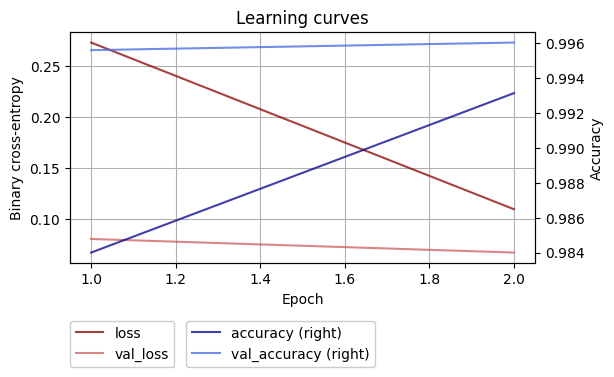

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_VGG19.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)

# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## EfficientNetB0

In [ ]:
def build_model_EfficientNetB0(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.EfficientNetB0(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output) 
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_EfficientNetB0 = build_model_EfficientNetB0(num_classes)

In [ ]:
model_EfficientNetB0.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 128, 128, 3)  0           ['input_12[0][0]']               
                                                                                                  
 normalization_1 (Normalization  (None, 128, 128, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                       

In [ ]:
#Fitting the model
history_EfficientNetB0 = model_EfficientNetB0.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 329s 200ms/step - loss: 0.1203 - accuracy: 0.9930 - AUROC: 0.9983 - val_loss: 0.0221 - val_accuracy: 0.9987 - val_AUROC: 0.9996
Epoch 2/2
1588/1588 [==============================] - 298s 187ms/step - loss: 0.0367 - accuracy: 0.9977 - AUROC: 0.9995 - val_loss: 0.0178 - val_accuracy: 0.9989 - val_AUROC: 0.9996


In [ ]:
#Evaluate using the test dataset
score_EfficientNetB0 = model_EfficientNetB0.evaluate(ds_test)
print('Test loss:', score_EfficientNetB0[0])
print('Test accuracy:', score_EfficientNetB0[1])

858/858 [==============================] - 115s 132ms/step - loss: 0.6118 - accuracy: 0.9691 - AUROC: 0.9768
Test loss: 0.6118144989013672
Test accuracy: 0.9691452980041504


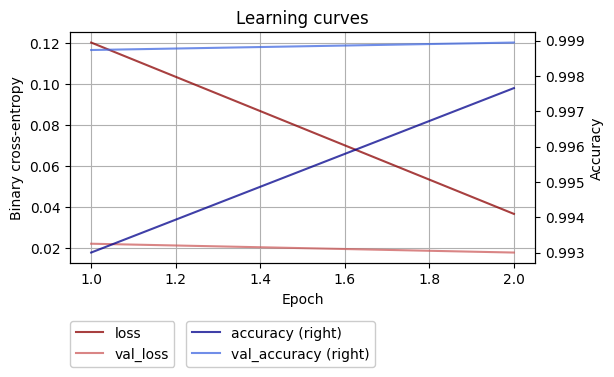

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_EfficientNetB0.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)

# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## MobileNetV2

In [ ]:
def build_model_MobileNetV2(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.MobileNetV2(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output) 
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_MobileNetV2 = build_model_MobileNetV2(num_classes)

In [ ]:
model_MobileNetV2.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_13[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']    

In [ ]:
#Fitting the model
history_MobileNetV2 = model_MobileNetV2.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 306s 188ms/step - loss: 0.4032 - accuracy: 0.9758 - AUROC: 0.9885 - val_loss: 0.1929 - val_accuracy: 0.9887 - val_AUROC: 0.9965
Epoch 2/2
1588/1588 [==============================] - 288s 181ms/step - loss: 0.2394 - accuracy: 0.9851 - AUROC: 0.9945 - val_loss: 0.1649 - val_accuracy: 0.9900 - val_AUROC: 0.9970


In [ ]:
#Evaluate using the test dataset
score_MobileNetV2 = model_MobileNetV2.evaluate(ds_test)
print('Test loss:', score_MobileNetV2[0])
print('Test accuracy:', score_MobileNetV2[1])

858/858 [==============================] - 112s 129ms/step - loss: 1.7938 - accuracy: 0.9265 - AUROC: 0.8936
Test loss: 1.7937631607055664
Test accuracy: 0.9264937043190002


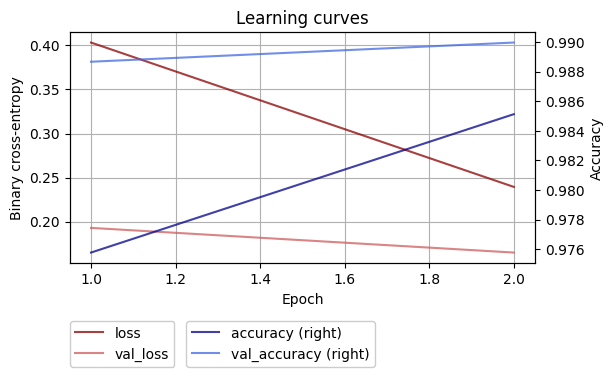

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_MobileNetV2.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## Resnet50

In [ ]:
def build_model_ResNet50(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.ResNet50(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output) 
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_ResNet50 = build_model_ResNet50(num_classes)

In [ ]:
model_ResNet50.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']  

In [ ]:
#Fitting the model
history_ResNet50 = model_ResNet50.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 323s 198ms/step - loss: 0.1023 - accuracy: 0.9940 - AUROC: 0.9985 - val_loss: 0.0283 - val_accuracy: 0.9984 - val_AUROC: 0.9995
Epoch 2/2
1588/1588 [==============================] - 358s 225ms/step - loss: 0.0317 - accuracy: 0.9982 - AUROC: 0.9995 - val_loss: 0.0209 - val_accuracy: 0.9989 - val_AUROC: 0.9996


In [ ]:
#Evaluate using the test dataset
score_ResNet50 = model_ResNet50.evaluate(ds_test)
print('Test loss:', score_ResNet50[0])
print('Test accuracy:', score_ResNet50[1])

858/858 [==============================] - 121s 138ms/step - loss: 0.7882 - accuracy: 0.9621 - AUROC: 0.9638
Test loss: 0.7881729602813721
Test accuracy: 0.9621211290359497


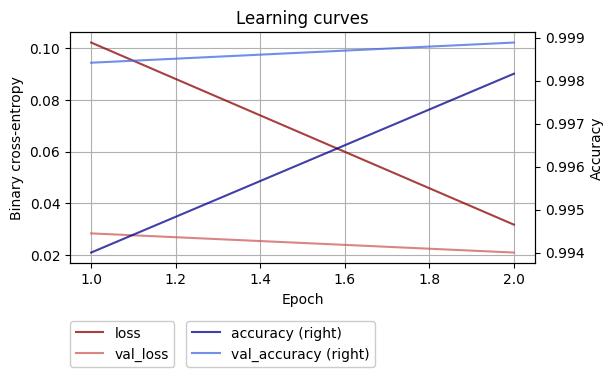

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_ResNet50.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## InceptionResNetV2

In [ ]:
def build_model_InceptionResNetV2(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.InceptionResNetV2(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_InceptionResNetV2 = build_model_InceptionResNetV2(num_classes)

In [ ]:
model_InceptionResNetV2.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_207 (Conv2D)            (None, 63, 63, 32)   864         ['input_15[0][0]']               
                                                                                                  
 batch_normalization_221 (Batch  (None, 63, 63, 32)  96          ['conv2d_207[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:
#Fitting the model
history_InceptionResNetV2 = model_InceptionResNetV2.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 364s 218ms/step - loss: 2.0229 - accuracy: 0.8992 - AUROC: 0.7622 - val_loss: 2.5533 - val_accuracy: 0.8785 - val_AUROC: 0.7127
Epoch 2/2
1588/1588 [==============================] - 328s 206ms/step - loss: 1.9117 - accuracy: 0.9020 - AUROC: 0.7875 - val_loss: 1.9637 - val_accuracy: 0.8886 - val_AUROC: 0.7843


In [ ]:
#Evaluate using the test dataset
score_InceptionResNetV2 = model_InceptionResNetV2.evaluate(ds_test)
print('Test loss:', score_InceptionResNetV2[0])
print('Test accuracy:', score_InceptionResNetV2[1])

858/858 [==============================] - 125s 144ms/step - loss: 2.2979 - accuracy: 0.8798 - AUROC: 0.7213
Test loss: 2.2979395389556885
Test accuracy: 0.8797799348831177


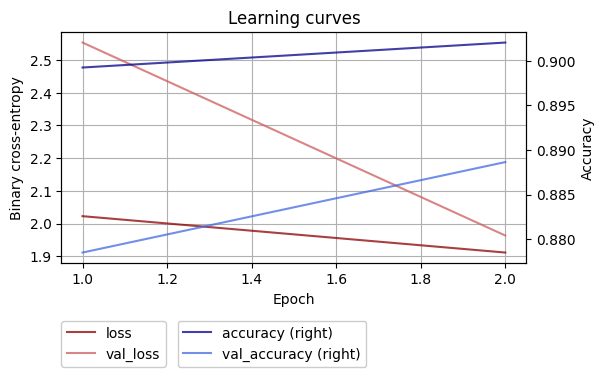

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_InceptionResNetV2.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## DenseNet201

In [ ]:
def build_model_DenseNet201(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.DenseNet201(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_DenseNet201 = build_model_DenseNet201(num_classes)

In [ ]:
model_DenseNet201.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_16[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_6[0][0]']       
                                                                                       

In [ ]:
#Fitting the model
history_DenseNet201 = model_DenseNet201.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 354s 211ms/step - loss: 0.2217 - accuracy: 0.9869 - AUROC: 0.9965 - val_loss: 0.0751 - val_accuracy: 0.9958 - val_AUROC: 0.9991
Epoch 2/2
1588/1588 [==============================] - 371s 233ms/step - loss: 0.1021 - accuracy: 0.9938 - AUROC: 0.9985 - val_loss: 0.0578 - val_accuracy: 0.9967 - val_AUROC: 0.9991


In [ ]:
#Evaluate using the test dataset
score_DenseNet201 = model_DenseNet201.evaluate(ds_test)
print('Test loss:', score_DenseNet201[0])
print('Test accuracy:', score_DenseNet201[1])

858/858 [==============================] - 125s 143ms/step - loss: 1.3193 - accuracy: 0.9546 - AUROC: 0.9370
Test loss: 1.3193308115005493
Test accuracy: 0.9545504450798035


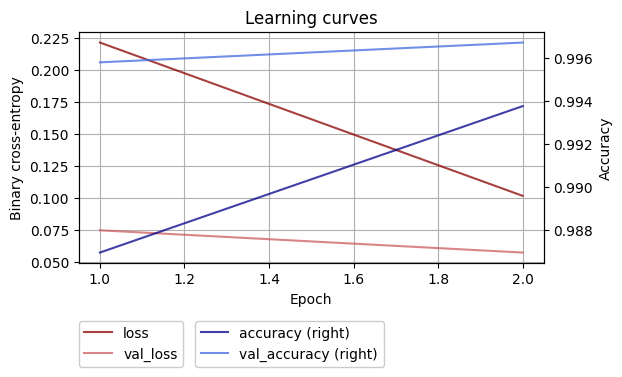

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_DenseNet201.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## NASNetMobile

In [ ]:
def build_model_NASNetMobile(num_classes):
  inputs = tf.keras.layers.Input(shape=(128, 128, 3))

  base_model = tf.keras.applications.NASNetMobile(include_top=False, 
                                                       input_tensor=inputs, 
                                                       weights="imagenet")
  
  base_model.trainable = False
  
  x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output) 
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(rate=0.2, name="top_dropout")(x)

  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
  
  model = tf.keras.Model(inputs, outputs, name="EfficientNet")
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), 
                loss="categorical_crossentropy", 
                metrics=[metrics.BinaryAccuracy(name='accuracy'),
                        metrics.AUC(name='AUROC')]
                )
  
  return model

model_NASNetMobile = build_model_NASNetMobile(num_classes)

In [ ]:
model_NASNetMobile.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 63, 63, 32)   864         ['input_17[0][0]']               
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 63, 63, 32)   128         ['stem_conv1[0][0]']             
                                                                                                  
 activation_594 (Activation)    (None, 63, 63, 32)   0           ['stem_bn1[0][0]']    

In [ ]:
#Fitting the model
history_NASNetMobile = model_NASNetMobile.fit(ds_train,
                              steps_per_epoch=len(ds_train),
                              validation_data=ds_val,
                              epochs=2,
                              validation_steps=len(ds_val)
                              )

Epoch 1/2
1588/1588 [==============================] - 354s 210ms/step - loss: 0.9144 - accuracy: 0.9452 - AUROC: 0.9507 - val_loss: 0.6603 - val_accuracy: 0.9602 - val_AUROC: 0.9732
Epoch 2/2
1588/1588 [==============================] - 323s 202ms/step - loss: 0.7410 - accuracy: 0.9546 - AUROC: 0.9662 - val_loss: 0.6135 - val_accuracy: 0.9635 - val_AUROC: 0.9764


In [ ]:
#Evaluate using the test dataset
score_NASNetMobile = model_NASNetMobile.evaluate(ds_test)
print('Test loss:', score_NASNetMobile[0])
print('Test accuracy:', score_NASNetMobile[1])

858/858 [==============================] - 121s 140ms/step - loss: 1.9610 - accuracy: 0.9070 - AUROC: 0.8348
Test loss: 1.9610199928283691
Test accuracy: 0.907016932964325


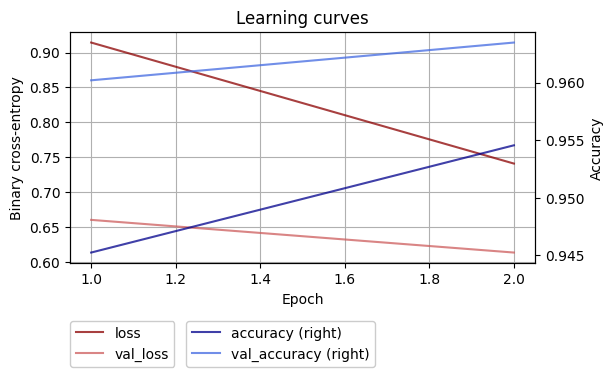

In [ ]:
# Create DataFrame object
df_hist = pd.DataFrame.from_dict(history_NASNetMobile.history)
df_hist["Epoch"] = np.arange(1, len(df_hist) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"]  #  ["AUROC", "val_AUROC"] 
ax = df_hist.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

## Our Best Model

**To be able to compare models, we first need to import the file "winner_model_hp.h5" created in the previous notebook "model_hyper_search.ipynb" to this notebook's temporary files.**

To download it either follow the link: https://drive.google.com/file/d/1lolhRD0s1Ns55w3pOp2AfXCMJ_PhQPCJ/view or run the next cell which will download it automatically.

In [ ]:
#Downloading the model
!gdown --fuzzy https://drive.google.com/file/d/1lolhRD0s1Ns55w3pOp2AfXCMJ_PhQPCJ/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1lolhRD0s1Ns55w3pOp2AfXCMJ_PhQPCJ
To: /content/winner_model_hp.h5
100% 24.7M/24.7M [00:00<00:00, 167MB/s]


Now we just need to import our best model with the hypersearched parameters and get the loss and accuracy scores to compare them with the pre-trained models.

In [ ]:
# Load a model externally
best_model = tf.keras.saving.load_model("/content/winner_model_hp.h5")

In [ ]:
#Evaluate using the test dataset
score_best_model= best_model.evaluate(ds_test)
print('Test loss:', score_best_model[0])
print('Test accuracy:', score_best_model[1])

858/858 [==============================] - 90s 104ms/step - loss: 1.0867 - accuracy: 0.7640
Test loss: 1.0866646766662598
Test accuracy: 0.763953685760498


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocessing (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 32)       1

# Comparison of Models and Conclusion


In [ ]:
print("|          Model           |   Nr of Parameters    |   Test Loss   |  Test Accuracy  |\n")
print("--------------------------------------------------------------------------------------\n")
print("|        Xception          |      20,890,162       |   "+str(round(score_Xception[0],5))+"    |     "+str(round(score_Xception[1],5))+"     |\n")
print("|          VGG16           |      14,721,866       |   "+str(round(score_VGG16[0],5))+"    |     "+str(round(score_VGG16[1],5))+"     |\n")
print("|          VGG19           |      20,031,562       |   "+str(round(score_VGG19[0],5))+"     |     "+str(round(score_VGG19[1],5))+"     |\n")
print("|        ResNet50          |      23,616,394       |   "+str(round(score_ResNet50[0],5))+"    |     "+str(round(score_ResNet50[1],5))+"     |\n")
print("|    InceptionResNetV2     |      54,358,250       |   "+str(round(score_InceptionResNetV2[0],5))+"    |     "+str(round(score_InceptionResNetV2[1],5))+"     |\n")
print("|       MobileNetV2        |      2,275,914        |   "+str(round(score_MobileNetV2[0],5))+"    |     "+str(round(score_MobileNetV2[1],5))+"     |\n")
print("|       DenseNet201        |      18,348,874       |   "+str(round(score_DenseNet201[0],5))+"    |     "+str(round(score_DenseNet201[1],5))+"     |\n")
print("|       NASNetMobile       |      4,284,510        |   "+str(round(score_NASNetMobile[0],5))+"    |     "+str(round(score_NASNetMobile[1],5))+"     |\n")
print("|      EfficientNetB0      |      4,067,501        |   "+str(round(score_EfficientNetB0[0],5))+"    |     "+str(round(score_EfficientNetB0[1],5))+"     |\n")
print("|        Our Model         |      2,049,674        |   "+str(round(score_best_model[0],5))+"    |     "+str(round(score_best_model[1],5))+"     |\n")

|          Model           |   Nr of Parameters    |   Test Loss   |  Test Accuracy  |

--------------------------------------------------------------------------------------

|        Xception          |      20,890,162       |   1.77656    |     0.92026     |

|          VGG16           |      14,721,866       |   0.58679    |     0.96769     |

|          VGG19           |      20,031,562       |   0.5342     |     0.97048     |

|        ResNet50          |      23,616,394       |   0.78817    |     0.96212     |

|    InceptionResNetV2     |      54,358,250       |   2.29794    |     0.87978     |

|       MobileNetV2        |      2,275,914        |   1.79376    |     0.92649     |

|       DenseNet201        |      18,348,874       |   1.31933    |     0.95455     |

|       NASNetMobile       |      4,284,510        |   1.96102    |     0.90702     |

|      EfficientNetB0      |      4,067,501        |   0.61181    |     0.96915     |

|        Our Model         |      2,049,6

Following a comparative analysis of the models, we have observed that the model with the least number of parameters is also the poorest performer (ours). Also, we have came to the conclusion that the best model is, by far, VGG19, with the highest Test Accuracy and lowest Test Loss. 
It is evident that an increase in the number of parameters entails a rise in computational costs and training time. Therefore, to obtain an equitable comparison, it is essential to evaluate our model alongside models with a similar number of parameters. In this regard, MobileNetV2 emerges as a suitable candidate, and it outperforms our model in terms of Accuracy in predicting the classes of our dataset as well as the Loss.